## Exploratory data analysis on Diwali_sales

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#### Loading datasets

In [3]:
df = pd.read_csv('Diwali Sales Data.csv', encoding='latin1')
df.head()


,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


#### Data cleaning

In [4]:
df.isnull().sum()

User_ID                 0
Cust_name               0
Product_ID              0
Gender                  0
Age Group               0
Age                     0
Marital_Status          0
State                   0
Zone                    0
Occupation              0
Product_Category        0
Orders                  0
Amount                 12
Status              11251
unnamed1            11251
dtype: int64

In [5]:
df['Amount'].fillna(df['Amount'].mean(),inplace=True)

C:\Users\Vikas\AppData\Local\Temp\ipykernel_20332\2049983670.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Amount'].fillna(df['Amount'].mean(),inplace=True)


In [6]:
df.isnull().sum()

User_ID                 0
Cust_name               0
Product_ID              0
Gender                  0
Age Group               0
Age                     0
Marital_Status          0
State                   0
Zone                    0
Occupation              0
Product_Category        0
Orders                  0
Amount                  0
Status              11251
unnamed1            11251
dtype: int64

In [7]:
cleaned_data=df.drop(['Status','unnamed1'],axis=1)

In [8]:
cleaned_data.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


In [9]:
cleaned_data=cleaned_data.dropna()

In [10]:
cleaned_data.shape,df.shape

((11251, 13), (11251, 15))

In [11]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11251 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [12]:
df['Amount']=df['Amount'].astype(int)
df['Amount'].dtype

dtype('int64')

In [13]:
cleaned_data.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [14]:
cleaned_data.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.125100e+04,11251.000000,11251.000000,11251.000000,11251.000000
mean,1.003004e+06,35.421207,0.420318,2.489290,9453.610858
std,1.716125e+03,12.754122,0.493632,1.115047,5219.569870
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,1.500000,5443.500000
50%,1.003065e+06,33.000000,0.000000,2.000000,8110.000000
75%,1.004430e+06,43.000000,1.000000,3.000000,12671.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


#### Exploratory data analysis

#### Gender count

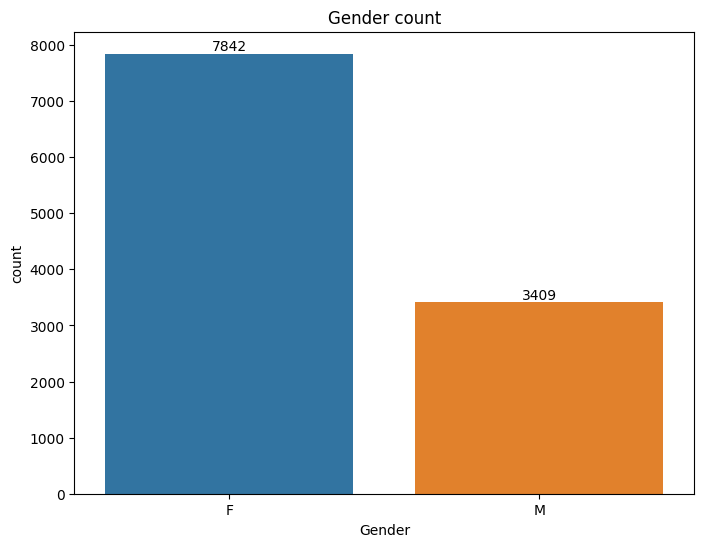

In [15]:
plt.figure(figsize=(8, 6))
gender_count_plot=sns.countplot(x='Gender',data=cleaned_data,hue='Gender')
plt.title('Gender count')

# To add numbers on vertical column
for bars in gender_count_plot.containers:
    gender_count_plot.bar_label(bars)
plt.show()

# Females are more than male

#### Grouping gender with amount and then sort the data

In [16]:
bar_plot=cleaned_data.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

<Axes: xlabel='Gender', ylabel='Amount'>

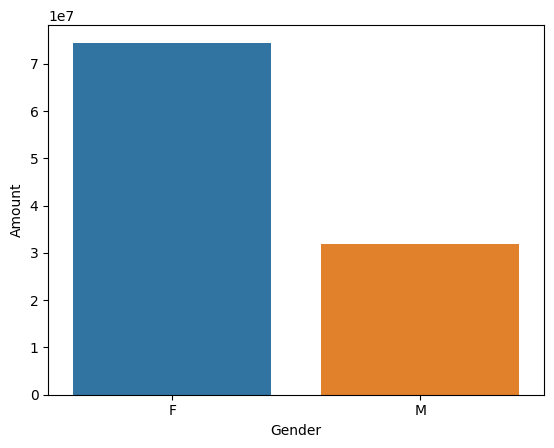

In [17]:
sns.barplot(x='Gender',y='Amount',data=bar_plot,hue='Gender')

# We can infer that purchasing power of female is more than male

#### Age count

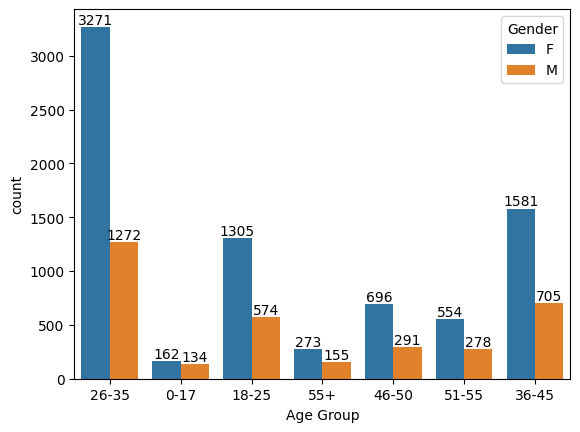

In [18]:
age_count_plot=sns.countplot(x='Age Group',data=cleaned_data,hue='Gender')
for bars in age_count_plot.containers:
    age_count_plot.bar_label(bars)

# We can infer that age group (26-35) participated more in the sale

#### Grouping Age Group with amount and then sort the data

In [19]:
bar_plot_age=cleaned_data.groupby(['Age Group'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
bar_plot_age

,Age Group,Amount
2,26-35,4.263235e+07
3,36-45,2.217336e+07
1,18-25,1.724073e+07
4,46-50,9.245658e+06
5,51-55,8.280384e+06
6,55+,4.090441e+06
0,0-17,2.699653e+06


<Axes: xlabel='Age Group', ylabel='Amount'>

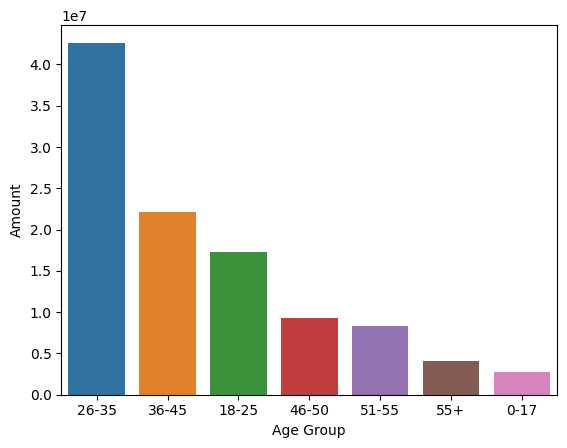

In [20]:
sns.barplot(x='Age Group',y='Amount',data=bar_plot_age,hue='Age Group')
# Most of the buyers from age group (26-35) are women 

#### State

In [21]:
cleaned_data.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [22]:
top_10_orders_statewise=cleaned_data.groupby(['State'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)

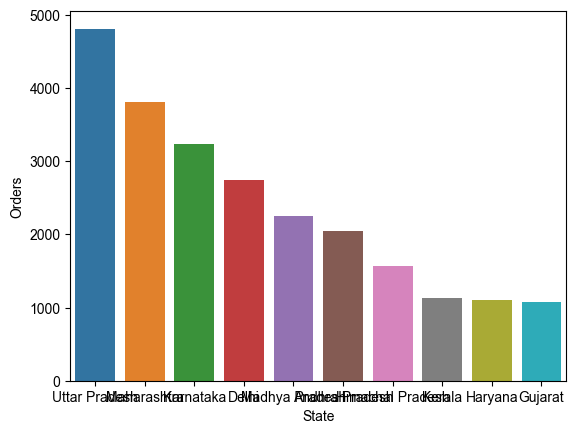

In [23]:
bar_plot_state_orders=sns.barplot(x='State',y='Orders',data=top_10_orders_statewise,hue='State',)
sns.set(rc={'figure.figsize':(20,5)})

# Top three states ordered most is uttar pradesh,maharashtra and gujarat

In [24]:
top_10_state_amount_statewise=cleaned_data.groupby(['State'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)

<Axes: xlabel='State', ylabel='Amount'>

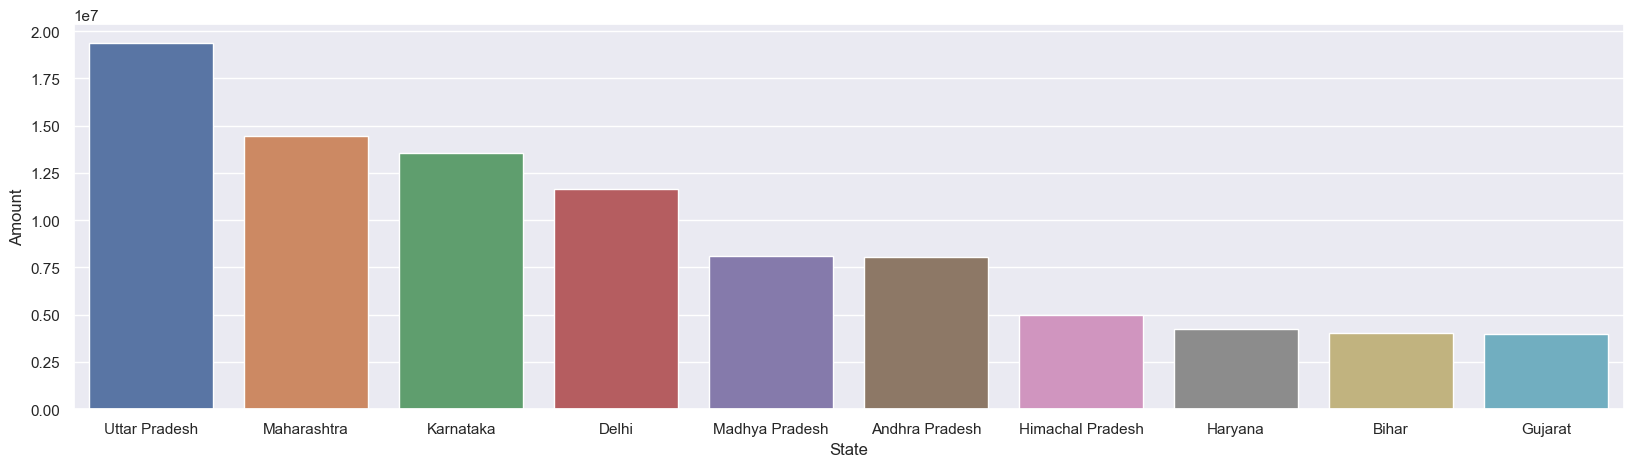

In [25]:
sns.barplot(x='State',y='Amount',data=top_10_state_amount_statewise,hue='State')
# Top three states which invested in diwali shopping are Uttar Pradesh,Maharashtra and Gujarat

#### Martial status

In [26]:
cleaned_data.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

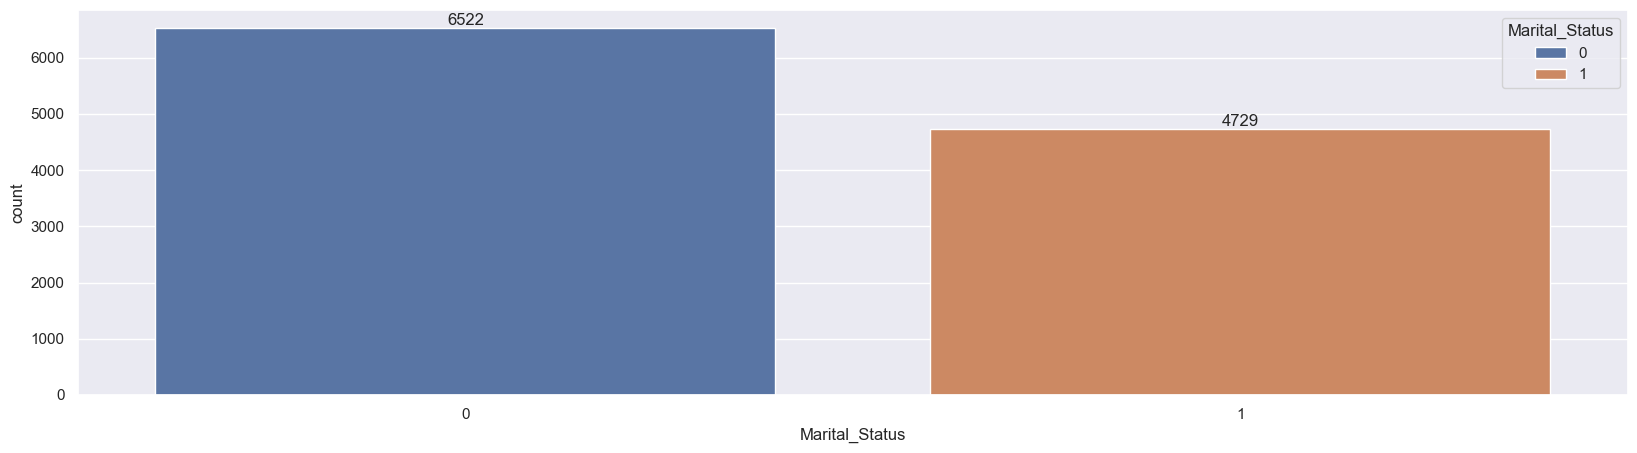

In [27]:
count_martial_status=sns.countplot(x=cleaned_data['Marital_Status'],data=cleaned_data,hue='Marital_Status')
for bars in count_martial_status.containers:
    count_martial_status.bar_label(bars)
sns.set(rc={'figure.figsize':(5,5)})

# Married people are more than unmarried people

#### Grouping marital_status with amount and then sort the data

In [28]:
sales_marital_status=cleaned_data.groupby(['Marital_Status','Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sales_marital_status

,Marital_Status,Gender,Amount
0,0,F,4.381501e+07
2,1,F,3.061538e+07
1,0,M,1.834819e+07
3,1,M,1.358399e+07


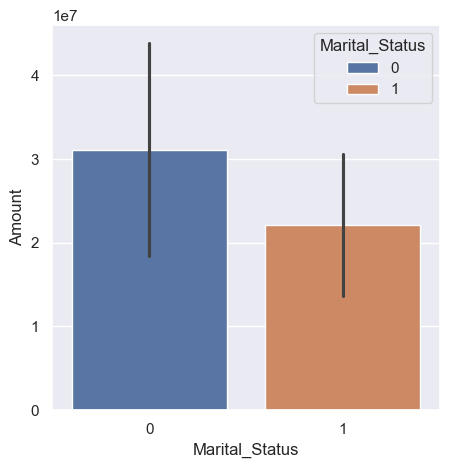

In [29]:
barplot_marital_status=sns.barplot(x='Marital_Status',y='Amount',data=sales_marital_status,hue='Marital_Status')

#### Occupations

In [30]:
cleaned_data.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [31]:
occupations_data=cleaned_data['Occupation'].unique()

#### Occupation count

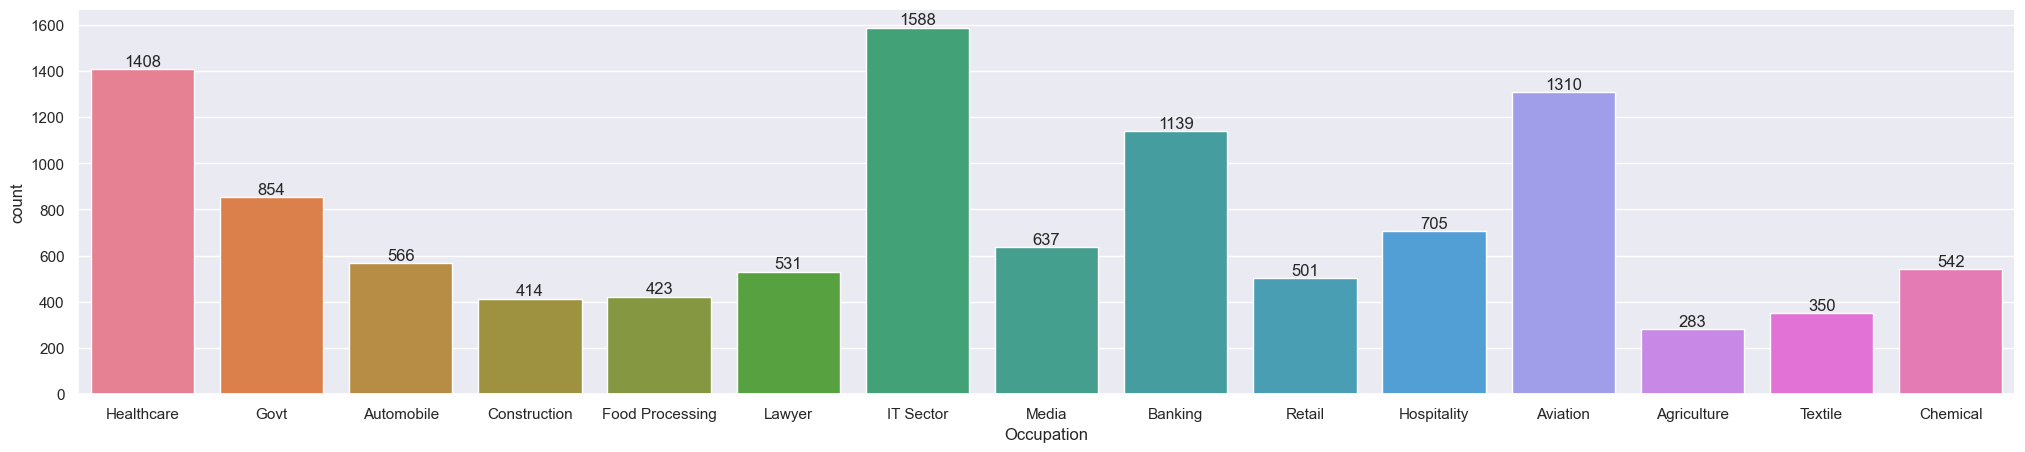

In [36]:
occupation_count=sns.countplot(x='Occupation',data=cleaned_data,hue='Occupation')
for bars in occupation_count.containers:
    occupation_count.bar_label(bars)
sns.set(rc={'figure.figsize':(20,5)})

# We can see that most of the people are from Healthcare ,IT sector,Aviation

#### Grouping occupations with amount and then sort the data

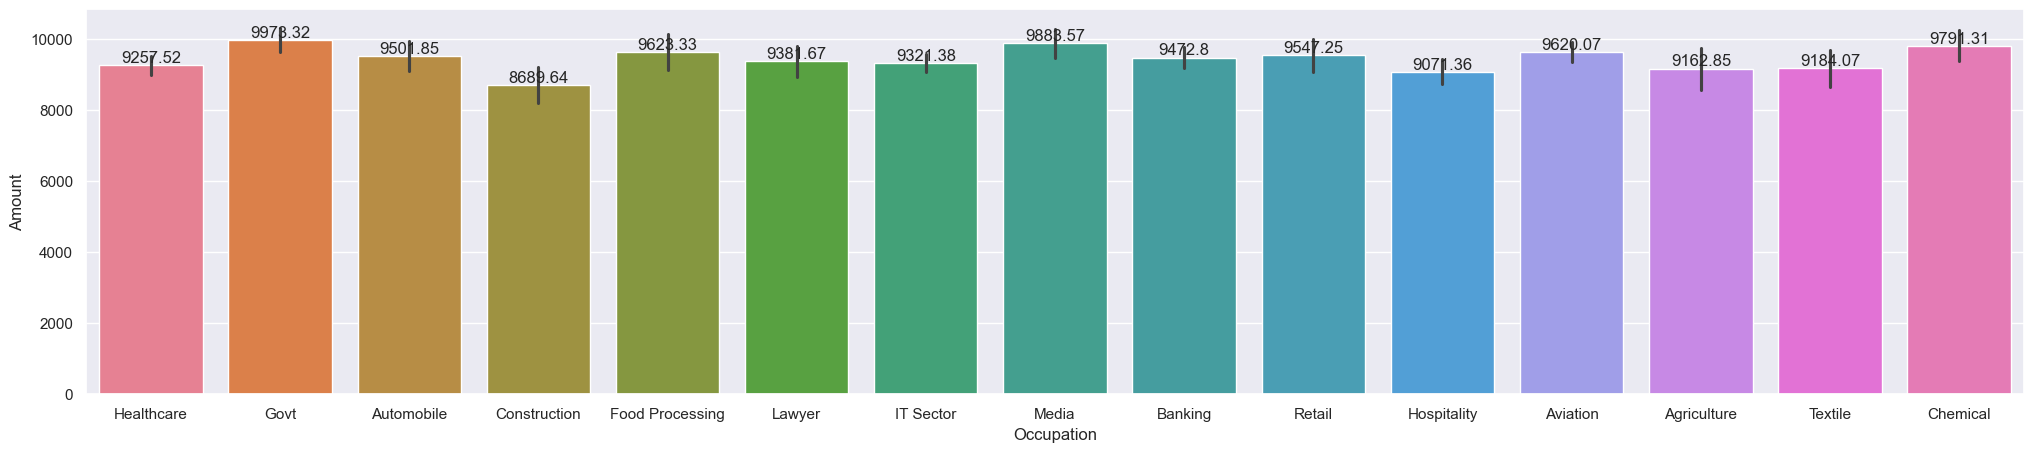

In [33]:
occupations_amount=cleaned_data.groupby(['Occupation'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
occupation_bar_plot=sns.barplot(x='Occupation',y='Amount',data=cleaned_data,hue='Occupation')

for bars in occupation_bar_plot.containers:
    occupation_bar_plot.bar_label(bars)

# We can see that most of the amount spent by people from Govt, Media occupation , chemical

#### Product category

#### Prodcut category count

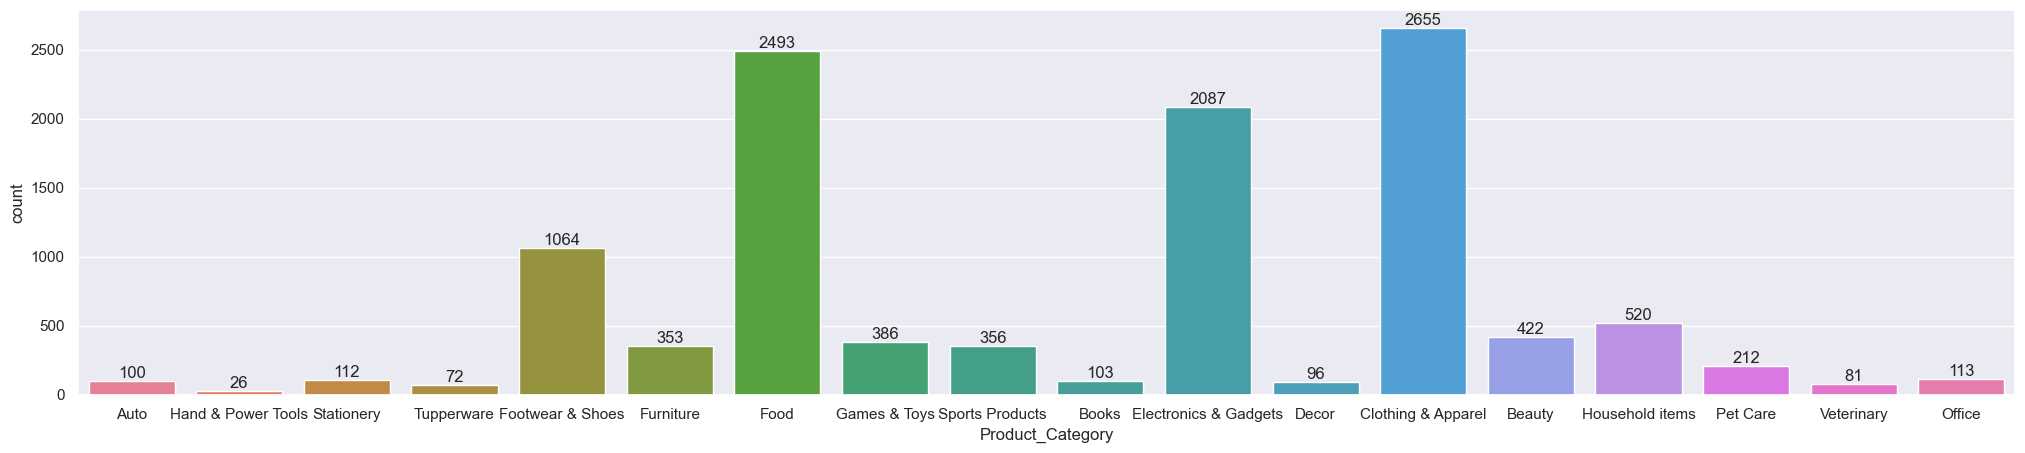

In [34]:
sns.set(rc={'figure.figsize':(25,5)})
product_category_count=sns.countplot(x='Product_Category',data=cleaned_data,hue='Product_Category')
for bars in product_category_count.containers:
    product_category_count.bar_label(bars)

# We can see that most of the people are from Clothing& Apparel, Food and Electronincs and Gadgets

#### Grouping product category with amount then sort the data

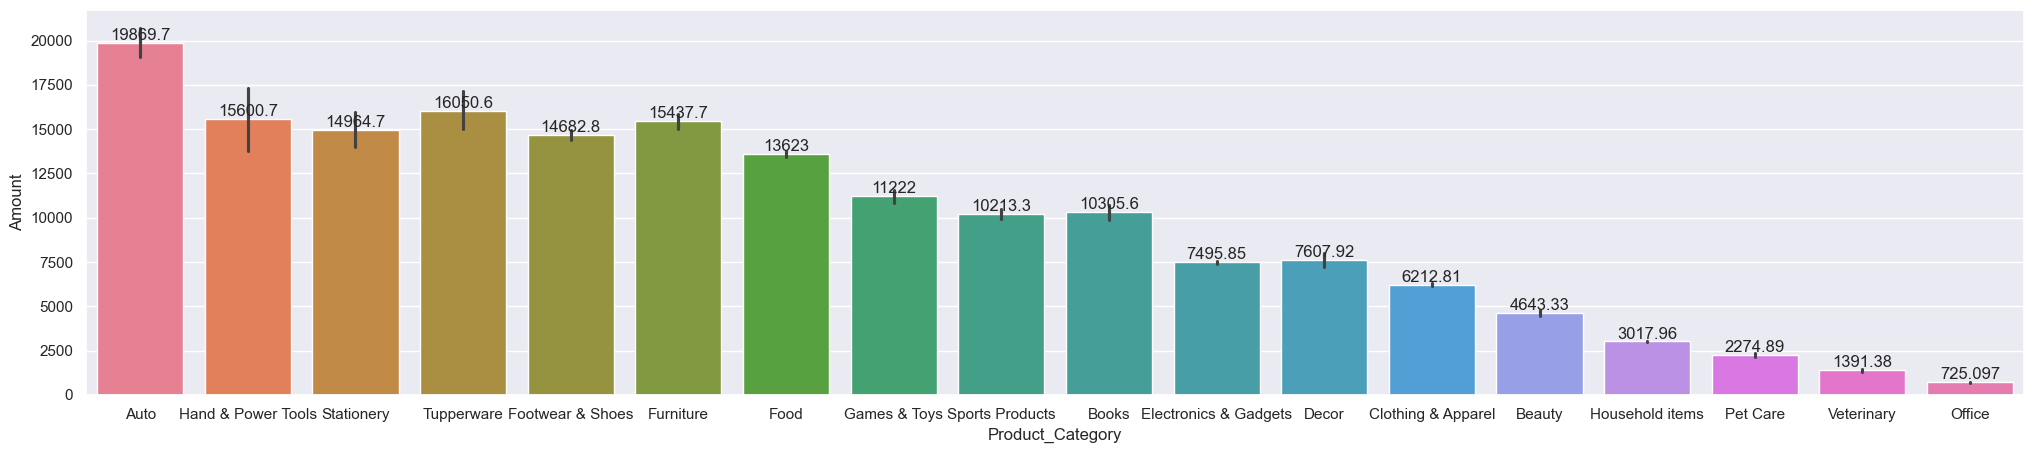

In [35]:
product_category_amount=cleaned_data.groupby(['Product_Category'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
occupation_bar_plot=sns.barplot(x='Product_Category',y='Amount',data=cleaned_data,hue='Product_Category')

for bars in occupation_bar_plot.containers:
    occupation_bar_plot.bar_label(bars)
# We can infer that highest amount been on Auto follwed by Hands & power tools an then Stationery 